# **Hirarchical Clustering**

It is a data analysis technique that organizes data points into groups based on similar characteristics. It creates a "cluster tree" where clusters start large and break down into smaller groups at each branching point.

1. We divide our features in different groups.
2. We try to make link between clusters on the basis of similarity and dissimilarity.
3. On the basis of dentogram graph we know about their links.
4. It's Top Down or Bottom Up approach.
5. We don't define the number of clusters (pre-specified).

## Two Methods

### 1. Agglomerative

- It's a bottom-up approach.
- Narrow to Broad.
- Every data point is a cluster at start.
- Then these points combine on the basis of similarity and dissimalarity to make clusters.
- Closest points make cluster.

### 2. Divisive

- It's a top-down approach.
- Broad to Narrow.
- Opposite to Agglomerative.
- You all belong to one cluster at start.
- Then we divide the points on the basis of similarity and dissimalarity to make clusters.
- Start with one bigger cluster and then divide them to make clusters.


## Similarity between Clusters Methods

1. **Min** -> Single Linkage Algorithm -> Look for similarity of near data points between two clusters.
2. **Max** -> Look for similarity of farthest data points between two clusters.
3. **Group Average** -> Take 5 or 10 data points average similarity and compare the similarity. It removes the biasness.
4. **Centroids Distance** -> Take centroid and calculate the distance between them.
5. **Ward's Method** -> Similar to group average method. But calculation depends on ward's methods.


## Limitation

1. Complex algorithm based on space and time.

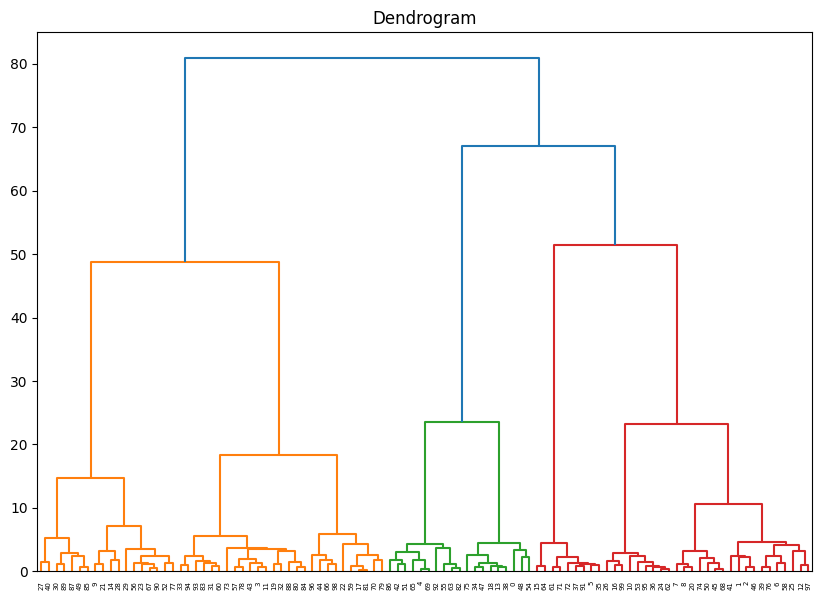

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# Generate a random dataset with 100 samples and 3 features
X, y = make_blobs(n_samples=100, centers=11, n_features=3, random_state=42)

# Perform hierarchical clustering with the AgglomerativeClustering algorithm
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clustering.fit(X)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

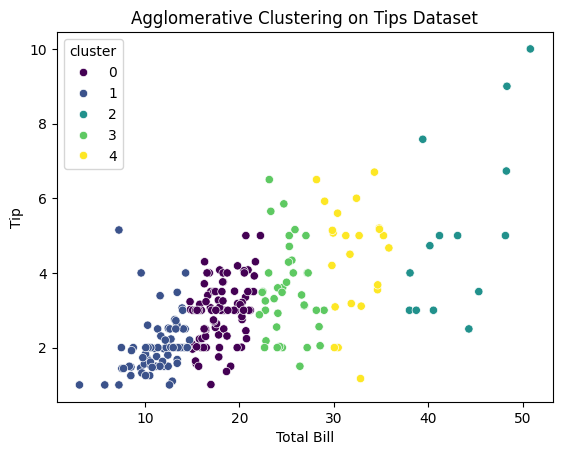

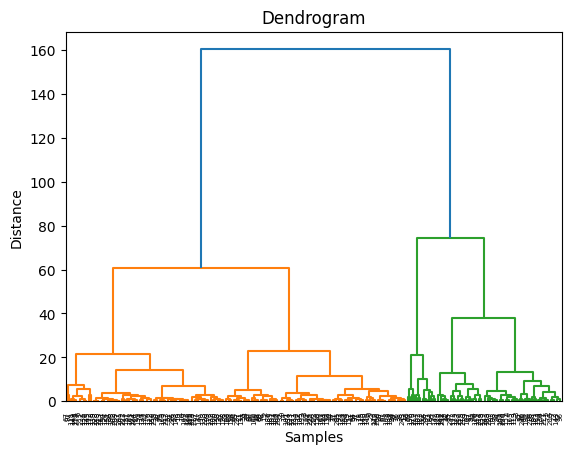

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# load the tips dataset
tips = sns.load_dataset('tips')

# select relevant features
features = ['total_bill','tip']

# extract the selected features from dataset
X = tips[features]

# Perform Agglomerative clustering
n_clusters = 5  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)

# Add cluster labels to the dataset
tips['cluster'] = agg_labels

# Visualize the clusters
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='cluster', palette='viridis')
plt.title('Agglomerative Clustering on Tips Dataset')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Plot the dendrogram
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

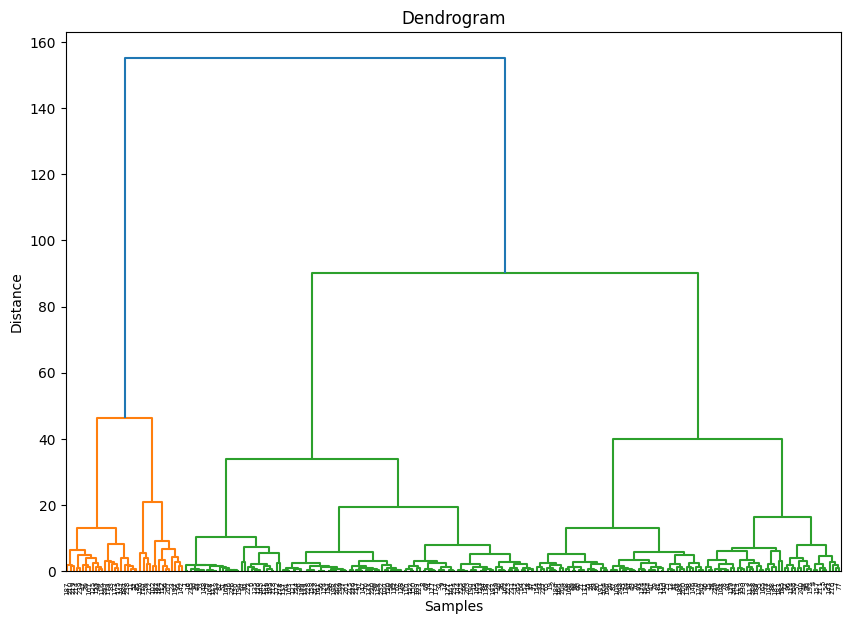

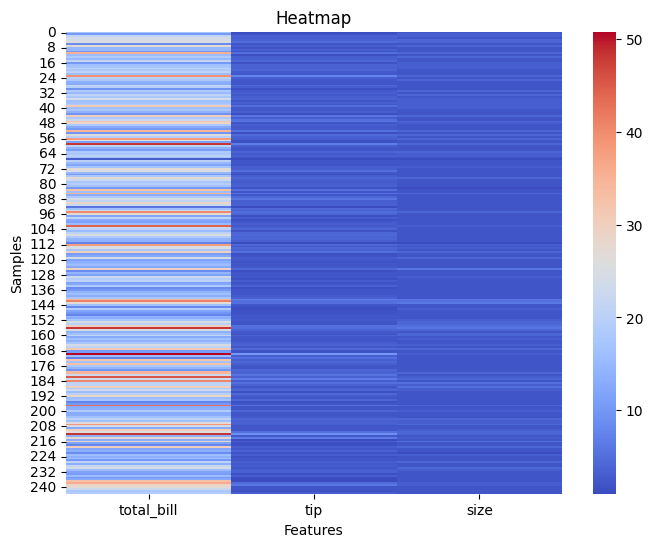

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Select relevant features for clustering
features = ['total_bill', 'tip', 'size']

# Extract the selected features from the dataset
X = tips[features]

# Compute the linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X, cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

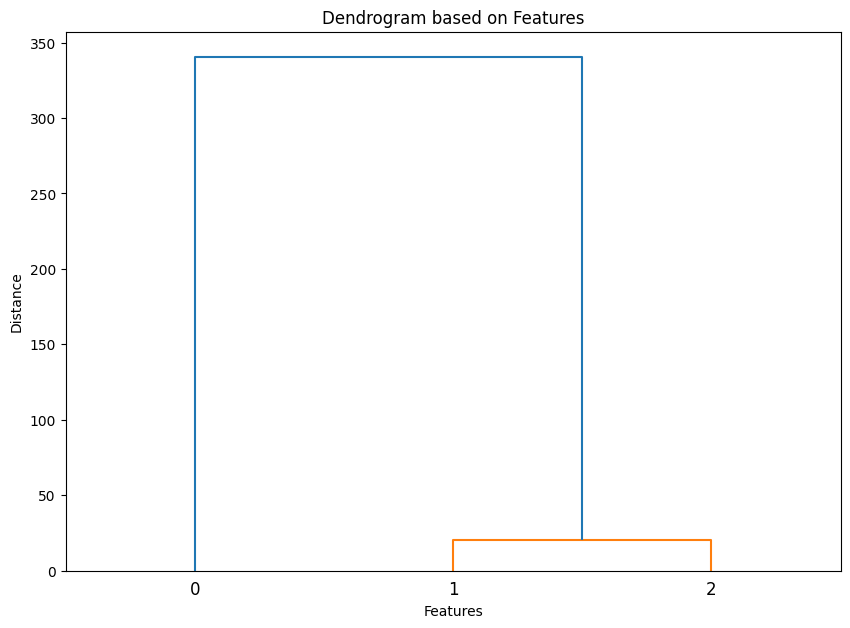

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Select relevant features for clustering
features = ['total_bill', 'tip', 'size']

# Extract the selected features from the dataset
X = tips[features]

# Transpose the data matrix
X_transposed = X.transpose()

# Compute the linkage matrix
linkage_matrix = linkage(X_transposed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram based on Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()